#Criando os nomes




In [2]:
import pandas as pd
import numpy as np

In [3]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [4]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [5]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [6]:
print("Quantidade de nomes: " ,len(nomes_f) + len(nomes_m))

Quantidade de nomes:  400


In [7]:
print("Quantidade de nomes: " ,nomes_f.shape[0] + nomes_m.shape[0])

Quantidade de nomes:  400


In [8]:
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome'].to_frame()


In [9]:
nomes.head(10)

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
5,JULIANA
6,MARCIA
7,FERNANDA
8,PATRICIA
9,ALINE


In [10]:
nomes.sample(5)

,nome
192,ZILDA
78,SILVIA
95,ANDREA
176,CELIO
8,PATRICIA


#Incluindo ID dos alunos

In [11]:
import numpy as np
np.random.seed(123)

In [12]:
total_alunos = len(nomes)
total_alunos

400

In [13]:
nomes.sample(3)

,nome
34,SEBASTIAO
42,MARLENE
103,MAICON


In [14]:
nomes["id_aluno"] =  np.random.permutation(total_alunos) + 1

In [15]:
nomes

,nome,id_aluno
0,MARIA,189
1,ANA,58
2,FRANCISCA,204
3,ANTONIA,383
4,ADRIANA,231
...,...,...
195,WALTER,9
196,ARLINDO,378
197,MICHAEL,50
198,ALVARO,244


In [16]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']

In [17]:
dominios = ['@dominiodoemmail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [18]:
nomes

,nome,id_aluno,dominio
0,MARIA,189,@dominiodoemmail.com.br
1,ANA,58,@servicodoemail.com
2,FRANCISCA,204,@servicodoemail.com
3,ANTONIA,383,@dominiodoemmail.com.br
4,ADRIANA,231,@servicodoemail.com
...,...,...,...
195,WALTER,9,@dominiodoemmail.com.br
196,ARLINDO,378,@servicodoemail.com
197,MICHAEL,50,@dominiodoemmail.com.br
198,ALVARO,244,@dominiodoemmail.com.br


In [19]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [20]:
nomes.head(10)

,nome,id_aluno,dominio,email
0,MARIA,189,@dominiodoemmail.com.br,maria@dominiodoemmail.com.br
1,ANA,58,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,204,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,383,@dominiodoemmail.com.br,antonia@dominiodoemmail.com.br
4,ADRIANA,231,@servicodoemail.com,adriana@servicodoemail.com
5,JULIANA,285,@servicodoemail.com,juliana@servicodoemail.com
6,MARCIA,105,@dominiodoemmail.com.br,marcia@dominiodoemmail.com.br
7,FERNANDA,237,@servicodoemail.com,fernanda@servicodoemail.com
8,PATRICIA,5,@servicodoemail.com,patricia@servicodoemail.com
9,ALINE,268,@dominiodoemmail.com.br,aline@dominiodoemmail.com.br


#Lista de Cursos

In [21]:
!pip3 install html5lib
!pip3 install lxml

In [22]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [23]:
cursos = cursos[0]

In [24]:
cursos.head(10)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


#Alterando index dos cursos

In [25]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [26]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [27]:
cursos = cursos.set_index('id')
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Matriculando os alunos nos cursos

In [28]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
193,LUCILENE,120,@dominiodoemmail.com.br,lucilene@dominiodoemmail.com.br,2
187,ELTON,82,@dominiodoemmail.com.br,elton@dominiodoemmail.com.br,2
32,MARCIO,344,@dominiodoemmail.com.br,marcio@dominiodoemmail.com.br,2
113,VICENTE,27,@servicodoemail.com,vicente@servicodoemail.com,2
199,NILZA,339,@dominiodoemmail.com.br,nilza@dominiodoemmail.com.br,1


In [29]:
nomes.matriculas.describe()

count    400.000000
mean       2.120000
std        1.498738
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [30]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


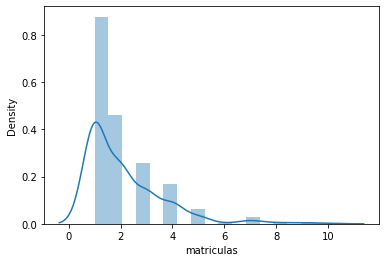

In [31]:
sns.distplot(nomes.matriculas)

In [32]:
nomes.matriculas.value_counts()

1     186
2      98
3      55
4      36
5      13
7       6
9       2
8       2
10      1
6       1
Name: matriculas, dtype: int64

#Selecionando cursos

In [33]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [34]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,189,13
1,58,4
2,58,4
3,58,4
4,58,10


In [41]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [37]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
22,ANDRE,364,@dominiodoemmail.com.br,andre@dominiodoemmail.com.br,2
17,FELIPE,100,@servicodoemail.com,felipe@servicodoemail.com,2
41,CLAUDIO,164,@servicodoemail.com,claudio@servicodoemail.com,3


In [38]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [39]:
matriculas.head()

,id_aluno,id_curso
0,189,13
1,58,4
2,58,4
3,58,4
4,58,10


In [42]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,56,Lógica de programação
2,36,Java para Web
3,67,C# para Web
4,97,Ruby on Rails
5,10,Cursos de Python


#Saída em diferentes formatos

In [43]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [44]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,56,Lógica de programação
1,36,Java para Web
2,67,C# para Web
3,97,Ruby on Rails
4,10,Cursos de Python
5,28,PHP com MySql
6,5,.NET para web
7,10,Novas integrações com Java
8,17,TDD com Java
9,45,Código limpo com C#


In [47]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":56,"2":36,"3":67,"4":97,"5":10,"6":28,"7":5,"8":10,"9":17,"10":45,"11":84,"12":25,"13":52,"14":70,"15":70,"16":5,"17":38,"18":19,"19":27,"20":87},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [49]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>56</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>36</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>67</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>97</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>10</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>28</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>5</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>10</td>\n      <td>Novas integrações com Java</td>\n 

In [50]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>56</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>36</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>67</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>97</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>10</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>28</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>5</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>10</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>17</td>
 

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

#Criando o banco sql

In [51]:
!pip3 install sqlalchemy

In [52]:
from sqlalchemy import create_engine, MetaData, Table

In [53]:
engine = create_engine('sqlite:///:memory:')

In [54]:
type(engine)

sqlalchemy.engine.base.Engine

In [55]:
matriculas_por_curso.to_sql('matriculas', engine)

In [56]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Buscando do banco sql

In [57]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [58]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,10,Cursos de Python
1,7,5,.NET para web
2,8,10,Novas integrações com Java
3,9,17,TDD com Java
4,16,5,Estatística básica
5,18,19,Programação funcional


In [62]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])
#query = 'select nome_do_curso,quantidade_de_alunos from matriculas'
#pd.read_sql(query, engine)

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,56
1,Java para Web,36
2,C# para Web,67
3,Ruby on Rails,97
4,Cursos de Python,10
5,PHP com MySql,28
6,.NET para web,5
7,Novas integrações com Java,10
8,TDD com Java,17
9,Código limpo com C#,45


In [63]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [75]:
muitas_matriculas.query('quantidade_de_alunos > 60 ')

,nome_do_curso,quantidade_de_alunos
2,C# para Web,67
3,Ruby on Rails,97
10,Preparatório para certificação Java,84
13,Desenvolvendo jogos,70
14,Análise de dados,70
19,Orientação objetos com Java,87


In [76]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
3,Ruby on Rails,97
10,Preparatório para certificação Java,84
19,Orientação objetos com Java,87


#Escrevendo no banco

In [77]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [78]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Nomes dos alunos e alunas da próxima turma

In [79]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,56,Lógica de programação
2,36,Java para Web
3,67,C# para Web
4,97,Ruby on Rails
5,10,Cursos de Python


In [80]:
matriculas.head()

,id_aluno,id_curso
0,189,13
1,58,4
2,58,4
3,58,4
4,58,10


In [81]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))

In [82]:
proxima_turma.head()

,id_aluno,id_curso
200,217,16
279,355,16
389,86,16
420,113,16
798,181,16


In [83]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
54,MARIO,138,@dominiodoemmail.com.br,mario@dominiodoemmail.com.br,1
176,CELIO,382,@servicodoemail.com,celio@servicodoemail.com,1
80,EMERSON,85,@dominiodoemmail.com.br,emerson@dominiodoemmail.com.br,1


In [84]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
217,16,SABRINA,@dominiodoemmail.com.br,sabrina@dominiodoemmail.com.br,2
355,16,SEBASTIANA,@dominiodoemmail.com.br,sebastiana@dominiodoemmail.com.br,4
86,16,JENIFER,@servicodoemail.com,jenifer@servicodoemail.com,2
113,16,ZILDA,@servicodoemail.com,zilda@servicodoemail.com,3
181,16,ALEXANDRO,@servicodoemail.com,alexandro@servicodoemail.com,1


In [86]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))[['nome']]

,nome
id_aluno,
217,SABRINA
355,SEBASTIANA
86,JENIFER
113,ZILDA
181,ALEXANDRO


In [87]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [91]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [92]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [93]:
proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

,Alunos do curso de Estatística básica
id_aluno,
217,SABRINA
355,SEBASTIANA
86,JENIFER
113,ZILDA
181,ALEXANDRO


#Excel

In [94]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [95]:
pd.read_excel('proxima_turma.xlsx')

,nome
0,SABRINA
1,SEBASTIANA
2,JENIFER
3,ZILDA
4,ALEXANDRO
